# OCR Cookbook

---

## OCR Exploration and Simple Structured Outputs (Deprecated)
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model (we recommend using the new Annotations feature instead for better results).

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Model Used
- Mistral OCR
- Pixtral 12B & Ministral 8B

---

**For a more up to date guide on structured outputs visit our [Annotations cookbook](https://github.com/mistralai/cookbook/blob/main/mistral/ocr/data_extraction.ipynb) on Data Extraction.**


## Setup

First, let's install `mistralai` and download the required files.

In [1]:
%%capture
!pip install mistralai

## Mistral OCR with PDF

We will need to set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [8]:
from mistralai import Mistral

# Replace with your actual API key obtained from the Mistral AI console
api_key = "DgkOjMahnBNalqAxHLqHtMNPp0Vjn2Nm"
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- 1. PDF files
- 2. Image files

Let's start with a PDF file:

In [11]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 42.5 MB/s eta 0:00:00


In [35]:
# Import required libraries
from pathlib import Path
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

# Verify PDF file exists
pdf_file = Path("/content/10-06_17-45-04.pdf")
assert pdf_file.is_file()

# Upload PDF file to Mistral's OCR service
uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

# Get URL for the uploaded file
signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

# Process PDF with OCR, including embedded images
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)

# Convert response to JSON format
response_dict = json.loads(pdf_response.model_dump_json())

print(json.dumps(response_dict, indent=4)[0:1000]) # check the first 1000 characters

{
    "pages": [
        {
            "index": 0,
            "markdown": "# \u7b2c\u4e09\u767e\u4e09\u5341\u4e00\u7ae0 \u91ce\u706b\u8513\u5ef6 \n\n\u6628\u591c\u4e0e\u5e7b\u666f\u4e4b\u738b\u7684\u4ea4\u6d41\uff0c\u867d\u7136\u53ea\u5b58\u5728\u4e8e\u610f\u8bc6\u5c42\u9762\u3002\n\u4f46\u90a3\u79cd\u6765\u81ea\u5deb\u738b\u7ea7\u5b58\u5728\u7684\u5a01\u538b\uff0c\u4ecd\u5728\u4ed6\u7684\u7cbe\u795e\u6df1\u5904\u7559\u4e0b\u4e86\u6df1\u523b\u5370\u75d5\u3002\n\n\u4e0d\u8fc7\uff0c\u8fd9\u79cd\u7ecf\u5386\u4e5f\u8ba9\u4ed6\u7684\u7cbe\u795e\u97e7\u6027\u5f97\u5230\u4e86\u610f\u5916\u7684\u953b\u70bc\u3002\n\u4ed6\u80fd\u6e05\u6670\u611f\u53d7\u5230\uff0c\u81ea\u5df1\u5bf9\u9ad8\u7ef4\u4fe1\u606f\u7684\u627f\u53d7\u80fd\u529b\u6bd4\u4e4b\u524d\u6709\u4e86\u663e\u8457\u63d0\u5347\u3002\n\"\u4e3b\u4eba\uff0c\u60a8\u4eca\u5929\u770b\u8d77\u6765\u72b6\u6001\u4e0d\u9519\u3002\"\n\u7231\u5170\u7684\u58f0\u97f3\u4ece\u95e8\u5916\u4f20\u6765\uff0c\u7fe0\u7eff\u7684\u8eab\u5f71\u51fa\u73b0\u5728

View the result with the following:

In [36]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    """
    Replace image placeholders in markdown with base64-encoded images.

    Args:
        markdown_str: Markdown text containing image placeholders
        images_dict: Dictionary mapping image IDs to base64 strings

    Returns:
        Markdown text with images replaced by base64 data
    """
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
        )
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    """
    Combine OCR text and images into a single markdown document.

    Args:
        ocr_response: Response from OCR processing containing text and images

    Returns:
        Combined markdown string with embedded images
    """
    markdowns: list[str] = []
    # Extract images from page
    for page in ocr_response.pages:
        image_data = {}
        for img in page.images:
            image_data[img.id] = img.image_base64
        # Replace image placeholders with actual images
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))

    return "\n\n".join(markdowns)

# Display combined markdowns and images
display(Markdown(get_combined_markdown(pdf_response)))

# 第三百三十一章 野火蔓延 

昨夜与幻景之王的交流，虽然只存在于意识层面。
但那种来自巫王级存在的威压，仍在他的精神深处留下了深刻印痕。

不过，这种经历也让他的精神韧性得到了意外的锻炼。
他能清晰感受到，自己对高维信息的承受能力比之前有了显著提升。
"主人，您今天看起来状态不错。"
爱兰的声音从门外传来，翠绿的身影出现在房间入口：
"昨晚的休息时间比平时长了一倍，是最近太累了吗？"
"算是给自己大脑稍微放个假。"
罗恩简短地回应，没有透露更多细节。
有些知识太过危险，即使是对最信任的助手也不能轻易分享。

他快速使用魔力清洗完毕，准备前往图书馆的禁忌区域。
卡桑德拉昨天给予的副教授级权限，让他有机会接触到那些此前无法查阅的隐秘资料。

关于古代炼金士的转职条件，以及那些失传已久的古老技艺，这些都是他迫切需要了解的知识。

走出移动工坊的瞬间，罗恩立即感受到了空气中微妙的变化。

那是一种类似于血腥味的兴奋气息。
街道两旁的水晶展示板，不再播放那些学术研究成果。
取而代之的，是一幅幅令人目眩神迷的异世界景观，每帧画面都在无声地诉说着征服的辉煌。

第一块展示板上，三颗血红色的太阳高悬在铜绿色的天空中。

地面是一片由活体骨骼构成的森林。
那些"树木"实际上是巨大的脊椎骨，高达数百米，表面覆盖着会自主蠕动的血管网络。

在这片诡异森林的空地上，一群蛛形生物正匍匐在征服者面前，用它们的八只细长手臂献上闪闪发光的"骨髓水晶"。

这些土著生物的外观令人作呕。
它们的头部是一个巨大的复眼，身体则像是被剥了皮的蜘蛛，内脏清晰可见。
"听说这种‘生命骨髓’能让魔药的效力提升好几倍......"
一个脸上长着黑斑的年轻学徒颤抖着说道，眼中的贪婪和恐惧交织在一起。

第二块展示板，展现的世界则更加扭曲。
那里没有固体地面，所有物质都处于某种半液体状态，不断变换着形状和颜色。

画面中央，数十个形似水母但大如房屋的透明生物漂浮在粘稠的空气中。

它们的身体内部，可以看到复杂的器官结构在缓慢蠕动。
这些生物，正用触手将一颗颗脉动的"心脏果实"递给站在浮空平台上的巫师们。

每当这些心脏果实脉动时，整个画面都会微微闪烁，仿佛连展示设备都受到了某种影响。
"机能强化材料......"
旁边一名戴着厚重护目镜的学徒喃喃自语:
"据说食用一颗就能让肉体强度达到普通龙裔的水平，但代价是......"

他没有说完，但聚在那块屏幕前很多对此有一定了解的学徒，都知道那个代价。

使用者的外貌会逐渐向那些水母生物转化，直到彻底失去人类的形态。

另外的圆面中，则是一个被永恒极光笼罩的冰雪世界。
在这个世界里，身高近十五米的冰霜巨人跪倒在征服者面前。

这些巨人用僵硬的手指，小心翼翼地献上一块块散发着阴冷气息的"灵魂冰晶"。

更可怕的是，画面中的巨人明显不是自愿献贡。
它们的后颈都插着一根细长的金属探针，那是某种控制装置。

每当探针闪烁时，巨人们就会机械地重复献贡动作，眼中的鬼火会变得更加微弱。

"完全的奴役......"
一名看起来颇有学识的高等学徒低声评论道: "这已经不是征服，而是......"
"而是什么？"旁边一个年长的学徒冷笑道:
"弱肉强食是宇宙的铁律。这些异族本来就是低等生命,能为我们巫师文明的发展做出贡献，是它们的荣幸。"

围观的学徒们陷入了微妙的沉默。
有些人眼中满是兴奋，仿佛已经看到了自己踏上征服之路的景象；

有些人则显得忧虑不安，显然对这种残酷的掠夺感到不适；

还有一些人保持着谨慎的中立，只是默默观察和思考。
"这些画面......都是真实的？"一个年轻女孩怯生生地问道。
"当然是真实的。"那名年长学徒的语气变得更加傲慢:
"我有个表叔在征服队伍中担任材料分析师，他告诉我，这些只是卡桑德拉塔主征服的十几个世界中最普通的几个。

那些真正有价值的战利品，根本不会在这里公开展示。"
他压低声音，神秘兮兮地补充道：
"据说塔主大人还征服了一个完全由时间构成的维度，那里的土著能够将记忆具现化为实体。想象一下，如果我们掌握了这种技术......"

年轻学徒们的眼睛开始发光，那种光芒中混合着贪婪、恐惧和病态的兴奋。

当罗恩走上街道时，这些嘈杂的讨论声戛然而止。
所有人的目光都转向了他，但没有人敢直视。
那些学徒们像受惊的小动物般迅速散开，但他能感受到无数道目光在身后跟随。
"是拉尔夫讲师....."
"新星计划的临时次席......"
"听说卡桑德拉塔主亲自为他举办了一场私人晚宴......"
每当他回头时，所有人都会迅速低下头，假装专心观看展示板。

这种奇怪的氛围，让罗恩想起了某些动物纪录片中的场景。

当顶级掠食者出现时，其他动物会本能地保持距离，既不敢挑解，也不敢忽视。

几名正式巫师保持着表面镇定，但他们眼神中的复杂情绪清晰可见。

敬畏、嫉妒、好奇，以及一种微妙的恐惧。
但那不是对罗恩本人的恐惧，而是对他背后征服派和卡桑德拉的恐惧。

继续向图书馆走去的路上，罗恩观察到了更多令人不安的变化。

那些原本专注于纯粹学术研究的巫师们，现在开始在街边的信息发布板前驻足，询问加入征服队伍的条件和要求。

平时门可罗雀的"异世界地理"和"大型战争法术"专业书店，现在门前排起了长队。

罗恩甚至看到几名平时温文尔雅的理论研究者，正激烈地讨论着各种掠夺技巧和奴役方法。
"听说‘精神枷锁’法术能够完全控制异族的思维......"
"但那种法术......受控制者的人格可能会被污染......"
"无所谓，谁会管那些异族，只要确保不反噬到自己就行了。"

这些对话，让罗恩想起了地球历史上那些殖民者和奴隶贩子。

在巨大利益的诱惑下，文明和道德的界限变得模糊不清，人性中最黑暗的一面开始显露。

更令人担忧的是，一些年轻学徒开始组织小型团体，讨论如何组团参与征服计划。

虽然他们目前的实力根本不足以进行跨界征服，但这种危险的思想已经开始萌芽。

整个水晶尖塔的氛围，正在发生根本性的转变。
曾经的学术严谨正在让位于冒险躁动，纯粹的知识追求正在被实用主义的掠夺欲望所取代。

知识依然重要，但现在它被赋予了更加险恶的意义。
不再是照亮文明前路的明灯，而是征服和奴役的工具。

罗恩在心中冷静地分析着这种变化。
从社会学角度来看，这是一个文明从内向发展转向外向扩张的典型特征。

当内部资源开始稀缺时，向外掠夺就成了维持发展的唯一选择。

但问题在于，这种转变的速度过于急剧，几乎没有给人们适应的时间。

卡桑德拉通过展示巨大的征服成果，人为地制造了一种 "征服狂热"，让原本理性的学者们也开始被贪婪驱动。

这种状况既为罗恩提供了机遇，也带来了危险。
一方面，在这种环境下，拥有强大实力和充足学术储备的他，更容易获得认可和资源；

另一方面，当整个社会都陷入疯狂时，保持理性反而可能成为一种危险的"异端"特征。

水晶尖塔图书馆的入口，矗立着一扇令人望而生畏的石门。

那是某种会根据观察者情绪变色的活体矿物。
当罗恩接近时，门面上那些沉睡的符文开始苏醒。
从暗淡的灰色逐渐转为警告性的稀红色，最后稳定为象征高权限的金色。

门前的守卫是一个三米高的水晶构造体。
它的身体由半透明的蓝色水晶构成，胸腔内悬浮着一颗不断旋转的能量核心。

更令人不安的是，这个构造体的"脸部"实际上是一面光滑的镜面，会实时反映观察者内心最深的恐惧。

当罗恩凝视那面镜子时，他看到的不是自己的面容，而是一个被无数触手缠绕的身影，那是他对未来可能失控的担忧具象化。
"身份确认中......"
构造体的声音如同水晶碎片摩擦般刺耳："检测到高级权限，开始深度扫描。"

接下来的身份验证过程令人极度不适。
构造体首先扫描了罗恩的魔力签名，然后用某种入侵性的

精神探针分析他的思维模式。
这种扫描持续了将近五分钟，那种被彻底审查的感觉令人极度不透。

他能感受到，构造体正在寻找某些特定"印记"。
......那些可能表明自己与危险存在有联系的蛛丝马迹。
幸运的是，昨夜与幻景之王的交流，没有在他的精神结构中留下明显痕迹。

巫王级存在，显然拥有完美掩盖自己影响的能力。
构造体那面镜子般的脸突然转向罗恩，声音中带着机械化的困惑:
"您的精神结构呈现出极其罕见的多层防护模式。
这种复杂程度......即使在副教授级别中也属于异常。"
它的能量核心转速明显加快，发出低沉的嗡鸣声：
"权限等级：副教授级。
特殊标注：新星计划成员。
精神污染抗性：需要进行实时测试以确定具体数值。"
构造体伸出一只由水晶构成的手臂。
那些水晶表面流动着诡异的符文，指向图书馆深处的一道几乎被阴影完全吞噬的暗门:
"请前往测试区域完成污染抗性评估。
提醒您，这是进入禁忌区域的必要程序，任何试图绕过此程序的行为将被视为对学派安全的直接威胁。"

罗恩跟随构造体穿过那道暗门，立刻感受到了空气质量的变化。

这里的大气，仿佛被某种看不见的重量压缩过，每一次呼吸都需要额外的努力。

他能听到从墙壁内部传来的微弱心跳声，仿佛整座建筑都是某种巨大生物的内脏。

测试室是一个完美的圆形空间，没有任何装饰，只有纯黑色的墙壁和地面。

房间中央悬浮着一颗直径约两米的巨大水晶球，其内部翻涌着令人作呕的暗色雾气。

那些雾气并非静止不动，而是在球体内部形成复杂的螺旋

图案。
每一次旋转，都会释放出微弱但极其危险的精神冲击波。
"这个装置......"罗恩启动"超凡辨识"，仔细观察着那颗水晶球。

在他的特殊视野中，球体表面覆盖着密密麻麻的符文网络，那些符文在不断地吸收和转化周围的能量。

更可怕的是，他能感受到球体内部，确实封印着某种活物的意识碎片。
"您看出了什么吗？"构造体似乎注意到了他的表情变化。
"这不是简单的测试装置。"罗恩冷静地分析道:
"球体内部封存的是真正深渊生物的精神残片，通过符文网络进行强度调节。这种设计......相当巧妙，但也极其危险。"
"很敏锐的观察。"构造体的语调中多了些赞许:
"确实，这些精神残片来自于深渊探索队击杀的各种高等生物。

它们的怨念和混乱意识被提炼出来，用于测试巫师的污染抗性。"

它停顿了一下，继续解释：
"测试将分为两个阶段。
如果在任何阶段出现不适，请立即示意停止。"
构造体的能量核心开始缓慢脉动，每次闪烁都让房间里的温度下降几度:
"需要特别提醒的是，曾经有一名自以为意志坚强的副教授，在测试中被彻底激活自己身上潜藏的污染。

测试结束后，他已经开始啃食自己的手指，一边流泪一边笑着说"终于找到真正的美味了"。"

这个细节，让罗恩的表情变得更加凝重。
精神污染的可怕之处，就在于它会从根本上扭曲受害者的认知和价值观。

被污染的人往往察觉不到自己异常，反而会认为这种扭曲的状态是"正常"甚至"美好"的。

而且，他感觉这个"构造体"的智能性和丰沛的情感表达，有点不太像是个人工智能?

"我明白风险。"罗恩点头示意，走向测试水晶球。
当他距离球体还有三米时，第一阶段测试悄然开始了。
水晶球内的雾气突然剧烈翻涌，释放出一股令人作呕的精神压力。

那并非简单的恐惧或焦虑，而具现化为一种更加根本性的存在否定。

仿佛有无数个声音在他耳边同时低语:
"你不应该存在....."
"你的努力毫无意义....."
"死亡是唯一的解脱......"
"为什么还要挣扎？为什么不接受虚无？"
就这?
对于修炼《瞕星者的呓语》的罗恩来说，这种程度的精神冲击几乎可以忽略不计。

他的冥想法本身就建立在与高位存在的沟通之上，早已让他的精神结构适应了来自高维的压迫。
"第一阶段通过，耗时十七秒。"构造体记录着数据:
"这个速度在副教授级别中属于优秀水平，开始第二阶段测试。"

水晶球的色彩开始变化，从暗灰色转为深紫色。
雾气的浓度也显著增加，几乎完全遮蔽了球体内部的结构。

第二阶段的精神冲击更加复杂和狡猾。
它不再是简单的否定和绝望，而试图从根本上扭曲罗恩的认知结构。

幻觉开始在他眼前浮现:
自己变成了一团蠕动的触手，正在吞瞄身边所有的同伴，而他却感到前所未有的满足；

爱兰的翠绿身影在他面前腐烂融化，变成一潍散发恶臭的脓液，但她的声音依然在感谢自己"解放"了她；

甚至整个中央之地在他的脚下坍塌，无数无辜生命因为他的行为而消逝，而他却站在废墟之上狂笑不已......

这些幻象试图让他相信，破坏和堕落才是真正的"快乐"，

理性和秩序只是自欺欺人的枷锁。
但这些扭曲的诱惑，完全无法动摇罗恩的理性核心。
在时间猎犬的追杀和"吞噬者"的威胁中锻炼出来的精神韧性，让他能够清晰区分现实与幻觉。

更重要的是，他对"控制自身"的强烈执念，为自己提供了足够的精神锚点。

无论幻象如何诱人，他都不会放弃对自身命运的掌控权。
"第二阶段通过，耗时一分十秒。"构造体的声音中带着明显的惊讶:
"测试完成，总耗时一分二十七秒。"
构造体的声音中带着难以置信:
"污染抗性等级：IV。这是副教授级别中的较高评级，您可以安全访问禁忌区域的大部分内容。"

它停顿了很久，似乎在处理某些复杂的数据:
"根据历史记录，只有六名副教授级人员获得过IV级，其中三人后来成功晋升为黯日巫师，一人更是晋升为大巫师，一人则成为了深渊探索队的队长......"

构造体没有说第六个人的结局，但罗恩能从它略微黯淡的能量核心中感受到某种不祥的暗示。

通过测试后，一道此前完全隐形的门扉在墙壁上显现出来。

门扉本身就是一件艺术品，由某种会自主呼吸的活体材料构成，表面覆盖着蠕动的血管网络。

当罗恩接近时，那些血管开始加速脉动，仿佛在欢迎一位久违的客人。

# 第三百三十二章 湮灭年代 

"欢迎进入禁忌知识区域，拉尔夫讲师。"
构造体的语调变得更加恭敬:
"希望您能在这里找到您所寻求的答案。但请记住, 有些知识一旦获得, 就再也无法遗忘。"

跨过那道门扉的瞬间，罗恩感到自己仿佛穿越了某种无形的屏障。

这里的空间明显不受正常物理法则约束，天花板高得看不到顶端，而地面则向四个方向无限延伸。

这里的书架，它们由某种会自主生长的活体骨骼构成。
这些骨架在缓慢但明显地蠕动着，表面覆盖着类似神经网络的细丝，随着来访者的思维活动而改变颜色。

诡异的是，书架会根据他的思维需求自动调整书籍的排列。

当他想到"三相巫师技艺"这个概念时，相关的典籍立刻浮现在最显眼的位置；

当他转念思考"古代技艺"时，书架上的内容又发生了相应变化。
"这种环境......"罗恩启动"隐者之识"，试图感知这个空间的本质。

书架是"肋骨"，地面是"肌肉组织"，而空气中弥漫的特殊能量则是"血液"。

这个活体图书馆在不断地分析、整理和重组其中的知识，确保最相关的信息总是出现在最容易被发现的位置。

阅读区域配备了精神稳定装置和紧急医疗设备。
一旦检测到危险的精神波动，就会自动释放镇静剂或启动紧急隔离程序。

罗恩选择了一个靠近"三相巫师技艺"书架的座位，刚一坐下，椅子立刻开始调整到最适合他身体曲线的形状。

同时，一个柔和的声音在他耳边响起：
"检测到使用者为副教授级权限，已解锁对应内容。建议阅读时间不超过四小时，超时可能造成精神疲劳累积。"

罗恩点头示意，开始翻阅那些吸引他注意的典籍。

第一本是《主流巫师技艺的进化轨迹》，一部厚达八百页的综合性研究著作。

作者是已故的大巫师艾萨克$\cdot$门德尔松，据说他曾经同时掌握过七种不同的巫师技艺。

当罗恩翻开封面时，立即感受到了一股微妙的精神压力。
这本书的每一页都蕴含着大量的高密度信息，需要消耗相当的精神力才能完全理解。

门德尔松的写作风格极其严谨，每一个结论都有大量实例和数据支撑。

但在严谨之中，又透露出一种深深的忧虑和警告：
"巫师技艺层次上的跃升，绝非简单的经验积累。
每一次跃迁都意味着知识本质的改变，意味着与更危险力量的接触。

许多巫师在追求力量的道路上迷失了自我，最终成为了力量的奴隶而非主人。"
"我曾经亲眼目睹一位才华横溢的炼金师，在成功晋升为炼金大师后的第三天，将自己的亲人转化为了"完美的炼金材料

当我质问他时，他用一种纯粹理性的语调回答： ‘感情是效率的敌人，我只是在优化资源配置。"

继续阅读下去，他开始了解到各个职业进阶的具体条件。
门德尔松用了整整一个章节，来分析魔药师的进阶路径：
"成为魔药教授需要在理论、实践、教学三个方面都达到极高水准。"

面前已经浮现出了详细的条件说明，仿佛是在回应罗恩的内心疑问:

【魔药教授（三星）进阶条件：
1.就职前置职业-魔药师（二星） $\checkmark$
2.魔药学技能达到专家级别
3.必须原创出至少一种魔药配方
4.需要培养出至少五名职业魔药师级别的学生】

接下来是炼金大师的部分，门德尔松的语调变得更加沉重:

"炼金术是所有超凡技艺中最接近‘神之领域"的学科。
炼金大师们试图理解并控制物质的本质，创造原本不存在的生命形式。

这种行为本身就是对自然秩序的挑战。"
【炼金大师（三星）进阶条件：
1.就职前置职业-炼金术师（二星） $\sqrt{ }$
2.炼金术达到专家级别
3.需要成功炼制出一件‘半永动’炼金装置（自行运转五十年及以上)
4.需要完成一次‘生命重构’实验】

门德尔松在这里插入了一段令人不安的记述:
"我曾经目睹一次‘生命重构’实验的全过程。
申请者将七种不同物种融合成了一个新的生命体。
那个生物确实活着，甚至表现出了超越原有物种的智能，但它眼中的痛苦和困惑让我终生难忘。

它不知道自己是什么，不知道自己从哪里来，只能发出一种介于多种叫声之间的诡异声音。

最终，它在实验完成的第三天选择了自杀。"
最后是符文专家——附魔师的进阶形态:
"符文专家是三种职业中最危险的进阶选择。
他们将符文的力量推向极致，甚至尝试将符文与活体生物结合。

这种技艺的掌握者往往会逐渐失去对‘界限’的认知。"
【符文专家（三星半）进阶条件：
1.就职前置职业-附魔师（二星半） $\sqrt{ }$
2.附魔学和符文学都达到精通级别
3.需要创造出自己的特殊符文
4.掌握‘血肉符文’技艺】

关于符文专家的失败例子，门德尔松没有进行任何注解，只是写了简单的一句:
"能够完成‘血肉符文’技艺的附魔师，在整个巫师历史都少

的可怜......"
看到这些详细的条件和警告后，罗恩反而感到了一种奇异的兴奋。

危险？当然存在，但任何值得追求的力量都伴随着相应风险。

关键是如何在获得力量的同时，保持对自身的控制。
他在心中快速分析着这三条进阶路径:
"魔药教授的条件相对最容易达成，我现在的魔药学水平已经接近专家级，而且有不少原创配方的积累。培养学生方面

他想起了自己的精英小组，特别是莉丝那种对魔药学的纯粹热爱:

"精英小组的成员都有很好的基础，假以时日应该能够培养出合格的魔药师，过几年应该就有机会培养出两个以上了。"
"炼金大师的条件最为苛刻，特别是‘半永动级’装置的制作。

这种装置需要运用到时间、空间、能量多个领域的顶尖技术......"

他想起了自己正在研究的移动模拟战装置:
"或许可以将模拟装置升级为半永动级别?
如果能够让灵魂碎片和暖心石等特殊材料，实现自我联通与维持，理论上可以达到要求。"
"符文专家的‘血肉符文’技艺最让人担忧，但也最具吸引力。

如果能够安全掌握这种技术，配合我现有的血脉调制能力，再加上替身木偶那种诡异融合能力......"

他看向自己的右手，那里曾经与替身木偶融合：
"也许可以从‘墨汁’开始实验？作为我亲手创造的炼金生物，它对我的信任度最高，而且自暧软泥怪的特性让实验风险相对可控。"

不过，这三个职业都没说需要属性值要求
或许是因为能够完成上面那些条件的，已经被默认为属性达到了要求?

合上第一本书，罗恩走向另一个书架区域。
这些书籍的外观明显更加古老和危险。
有些甚至在书脊上长出了类似眼睛的器官，会跟随访问者的移动而转动。

他选择了一本题为《湮灭年代的遗产》的厚重典籍。
作者是一位名叫瓦西$\cdot$古尔德的月耀级巫师，也是个资深历史学者。

据说他一生都在追寻各类古代秘闻，最终在一次深渊探索中失踪。

翻开书页的瞬间，罗恩感到一股阴冷的气息从纸张中散发出来。

这本书记录的不仅仅是知识，更是那些知识背后的血腥历史。

古尔德用近乎痴迷的笔调，详细描述了古代炼金士们的传奇与悲剧:
"蓝斯$\cdot$赫维特，这个名字在巫师史上闪闪发光，但很少有人知道他成功背后的黑暗真相。"
"他的确是仁慈的，但只是相对而言。与同时代的其他炼金士相比，蓝斯的实验很少涉及不必要的残忍。

但"相对仁慈"和"真正仁慈"之间，存在着鲜血铺就的鸿沟。"
"根据我在废弃实验室中发现的记录，蓝斯在成为古代炼金士前的研究过程中，总共"消耗"了一千三百七十二名实验体。

其中包括两百名志愿者，九百名战俘，以及一百七十二名"购买'来的奴隶。"
"他会在每次实验前向实验体道歉，会在实验后为死者默哀，甚至会记录下每一位实验体的姓名和家庭情况。

但这种"仁慈"改变不了一个事实：一千三百七十二个活生生的生命被他转化为了实验数据。"
"然而，真正让我夜不能寐的，还是蓝斯留下的一句话：
"如果有来生，我希望能够找到一种不需要牺牲他人的研究方法。

但在今生，我必须在有限时间内取得突破，为了更大的善，只能容忍较小的恶。"

古尔德的分析让罗恩陷入了深思:
"这就是古代炼金士的真实面目。
他们不是单纯的疯子或恶魔，而是在极端环境下做出极端选择的研究者。

当生命的价值与知识的价值产生冲突时，他们选择了知识。"

书中接下来介绍了其他几位古代炼金士的事迹，每一个都是奇迹与噩梦的结合体:
"亚历山大$\cdot$金，被称为"仁慈炼金士"，就像他的称号那样，亚历山大确实从未主动伤害过无辜。

但他的"仁慈"建立在一个另一种基础上一一他只使用自己的身体进行实验。"
"在其生命的最后一百年，亚历山大已经将自己改造成了一个活动的实验室。

他的血液被替换为各种魔药，器官被改造为炼金装置，甚至连骨髓都被转化为能量储存单元。"
"目击者描述，最后时刻的亚历山大看起来更像是一个透明的人形容器，体内流淌着各种颜色的液体。

他能够直接用身体合成任何已知的魔药，但代价是彻底失去了作为'人类'的所有情感与意识。"
"艾蕾娜$\cdot$月辉，历史上罕见的女性炼金士。她的专长是情感炼金术——将情感转化为实体的技艺。"
"艾蕾娜创造了一个庞大的"情感宝库"，其中储存着数万人的爱、恨、恐惧、绝望等情绪。

她声称这些情感都是"自愿捐献"的，但据幸存者回忆，她的"捐献仪式"往往伴随着强烈的精神控制。"
"最终，艾蕾娜被自己的创造物反噬。
那壸被提取的负面情感聚合成了一个巨大的憎恨实体，将她困在了宝库深处。

据说她至今仍然活着，但已经与那个憎恨实体融为一体，成为了纯粹恶意的化身。"

读到这里，罗恩不由自主地想起了自己创造"墨汁"时的情景。

虽然只是改造了一些深渊生物组织，但那种创造生命的感觉确实令人着迷。

如果没有足够的自制力，确实很容易在这条路上越走越远。

古尔德的记述中还包括了一些更加黑暗的例子:
"艾格斯$\cdot$拉可鲁，在追寻贤者之石的过程中彻底堕落。
他声称自己找到了制作贤者之石的方法，但我只在记载中看到了他一次性储存了几万名不同种族幼童的纯真灵魂。"
"达米安$\cdot$普奇，他的实验室被发现时，里面有超过五千具各种状态的尸体。

有些被改造为活体器官培养皿，有些被融合为多头怪物，还有些被制作成了具有部分意识的工具。

最可怕的是，其中许多实验体在被发现时依然活着，并且保持着清醒意识。"

这些记录，让罗恩深刻理解了为什么现代巫师对古代炼金士既敬畏又恐惧。

他们的成就确实伟大，但达成这些成就的手段却令人发指。

然而，古尔德在书的最后部分又提出了一个令人深思的观点:
"我们有什么资格谴责他们？现代巫师的前行，同样建立在无数生命的牺牲之上。

大深渊中每个月都会让上千名探索者‘消失’，水晶尖塔的地下实验室中关押着各种族的大量实验体，征服战争中屠戮的异族生命更是难以计数。"
"我们与古代炼金士的唯一区别，就是我们更善于隐藏自己的罪恶，更善于为暴行寻找道德借口。

我们说是'为了文明的进步，他们说是‘为了知识的突破’，本质上有什么不同吗？"
"也许真正的问题不在于他们做了什么，而在于我们是否有勇气承认，在追求力量的路上，纯洁无垠的双手是不存在的。"

这个观点，让罗恩一时间有些不知道该说些什么。
作为一个追求力量的研究者，他当然理解那种为了突破而不择手段的冲动。

但另一方面，理性告诉他，完全抛弃底线的结果往往是自我毁灭。

"关键在于找到平衡点。"
他在心中总结着:
"并非完全拒绝特殊手段，而要确保这些手段服务于更大的目标，而非成为目标本身。"

随着阅读的深入，罗恩开始感受到越来越重的精神压力。
这些禁忌知识如同有生命的寄生虫，试图在他的意识中扎根。

头痛开始加剧，太阳穴处传来阵阵刺痛；
视线偶尔会出现模糊，看到一些不存在的影像，那是古老的炼金实验室中，无数扭曲的生物在玻璃容器中蠕动；

耳边开始听到微弱的呓语声，那是来自某些早已死去但灵魂仍被困在知识中的古代学者；

手指开始轻微颤抖，翻页时需要格外小心，生怕触发书页中隐藏的精神陷阱。

但令他感到意外的是，这种负担比预期中要轻得多。
昨夜与幻景之王交流时承受的威压，确实为他的精神结构提供了宝贵的锻炼。

这种程度的知识冲击，虽然依然令人不适，但已经在他的承受范围内。
"看来高维存在的威压虽然痛苦，但也确实能够锻炼精神韧性，"

罗恩在心中评估着自己的状态:
"这种'疫苗式'的锻炼方法，或许值得进一步研究。"
当午后的阳光开始西斜时，他合上了最后一本典籍。
长时间的阅读让他感到疲惫，太阳穴的疼痛也在提醒他精神负荷已经接近极限。

但收获也是巨大的。
他现在对自己未来的发展道路有了清晰的认识，也明白了哪些目标是现实的，哪些需要长期努力。

另一方面，他也对"力量的代价"有了更深刻的理解。
每一种技艺的掌握都需要付出相应的代价，关键是要确保这种代价在可接受的范围内。

原本还想查找一些关于深渊深层的资料，但此时阅读禁忌

知识所带来的思维重负，已经达到了一个危险的临界点。
继续强行阅读只会增加精神污染的风险，得不偿失。
而且在深渊观测站中，实际上也保留了不少比图书馆更加详细和实用的资料。

等下周回去工作时，利用卡桑德拉给自己的权限申请查阅，应该能获得更有价值的信息。

走出禁忌区域时，那个水晶构造体再次对他进行了扫描。
"检测到中度精神疲劳，建议休息72小时后再次进入禁忌区域。"

构造体的声音中带着关切："希望您能够善用获得的知识。"
"我会的。"罗恩简短地回应，心中却在思考着如何将今天的收获转化为实际的发展计划。

夕阳西下，中央之地的高塔群在余晖中闪闪发光。

In [22]:
# --- XÓA HOẶC GHI CHÚ DÒNG PRINT CŨ NÀY ---
# print(json.dumps(response_dict, indent=4)[0:1000])



# 'pdf_response' đã chứa kết quả. Ta chỉ cần lặp qua và in ra nội dung.
# Thuộc tính .markdown chính là chuỗi văn bản với các dấu xuống dòng đã được giữ lại.
for page in pdf_response.pages:
    print(page.markdown)
    print("\n") # Thêm một dòng trống để dễ đọc giữa các trang

# 第076章：没有那把剑，我照样可以守护哥哥！【求订阅】 

"你是?"
宁晚舟朱唇轻启，御音磁性。
宁昭云与苏白粥有些私交，她却完全不认得这女子。
"苏白粥。"
苏白粥淡淡地道："苏白念的妹妹，苏白粥。"
她又刻意强调了一遍。
眼眸的底色在淡蓝与血红之间不停流转。
"哦？"
宁晚舟美眸一凝，笑问："白粥妹妹所为何来？"
"你为什么要退婚？"
苏白粥冷冷质问："念哥哥有哪一点配不上你，你为什么要退婚，让他伤心！"
"......"
宁晚舟笑颜一滞。
苏白念哪一点配不上她？好像哪一点，都配不上。
只是这样的话，她说不出口。
对面的少女状态显然很不对劲，似在清醒与疯癫之间。
这话若是出口，对方只怕要炸。
可偏偏这里是苏武侯府。
她的身份若是曝光，明日必定满城风雨。
嗡——
苏白粥却不管这些。
黑鞘长剑出现在手中，身上衣袖无风自动。
"住手！"
宁晚舟不由惊呼。
"不许你......伤害哥哥......"苏白粥眼底淡然骤然转红。
锵唧一声。


长剑已然出鞘。
退！
宁晚舟面色一变，身形陡然升空，化作一道流光。
"别走。"
苏白粥双眸杀意腾腾，竟也腾空而起追了上去。
这一夜。
青禾郡的夜空极为热闹。
常人皆以为这年关将过，竟还有人放烟花。一些真正的高人如青禾郡守、城防大将，还有宁家太上阁的几位仙人。

与在郡守府中盘桓多日的一位仙人，苏白粥的那位师尊。
皆走出屋外。
亲眼目睹了一场精彩的大战。
......
许久。
一道白影从天而降，落在侯府小院前。
少女衣衫零落，露出片片雪肤。
悄然透过窗沿，痴痴望着屋内沉睡的男子。
"念哥哥......有白粥在......没有人能伤害你的......"
"......没有人。"
今夜。
她没能在宁晚舟身上讨得好处，但也没有让对方好过。只要魔剑在手......敢伤害哥哥的人，全都得死!
"不。"
少女眼眸突然转红，恍惚中似有一个身穿黑衣的少女虚影，自她身上浮现淡漠道："这世上没人有资格......做我哥哥

忽然眸底无尽血色泛起点点淡蓝。
少女冷漠的面容，再度楚楚可怜："求你......把力量再借我用一次......"
"你差点害死自己。"
"求求你......"


她疯疯癫癫，反反复复。
忽地抱头痛呼，跌跌撞撞离开院子，"哈哈哈，没有那把剑，我照样可以守护哥哥......"
![img-0.jpeg](img-0.jpeg)

而

In [ ]:
# Import các thư viện cần thiết
from google.colab import files
from IPython.display import display, HTML
from mistralai import DocumentURLChunk
import json
import re

# ----- BẢNG TRA CỨU TỔNG QUÁT: LaTEX -> UNICODE -----
# Đây là nơi bạn có thể dễ dàng thêm các ký hiệu mới trong tương lai
LATEX_TO_UNICODE = {
    # Các ký hiệu bạn đã gặp
    '\\cdot': '·',
    '\\checkmark': '✓',
    '\\sqrt{ }': '√',
    '\\sqrt{}': '√',

    # Các ký hiệu toán học phổ biến khác
    '\\times': '×',
    '\\div': '÷',
    '\\pm': '±',
    '\\le': '≤',      # Less than or equal to
    '\\ge': '≥',      # Greater than or equal to
    '\\neq': '≠',     # Not equal to
    '\\approx': '≈',   # Approximately equal to

    # Các chữ cái Hy Lạp
    '\\alpha': 'α',
    '\\beta': 'β',
    '\\gamma': 'γ',
    '\\delta': 'δ',
    '\\pi': 'π',
    '\\Pi': 'Π',
    '\\sigma': 'σ',
    '\\omega': 'ω',

    # Mũi tên
    '\\rightarrow': '→',
    '\\leftarrow': '←',
    '\\Rightarrow': '⇒',

    # Ký hiệu khác
    '\\infty': '∞',   # Vô cực
    '\\degree': '°',  # Độ
}

# ----- HÀM CHUYỂN ĐỔI TỰ ĐỘNG -----
def convert_latex_to_unicode(match):
    """
    Hàm này được gọi cho mỗi chuỗi LaTeX tìm thấy (ví dụ: '$\\cdot$').
    Nó tra cứu lệnh (ví dụ: '\\cdot') trong bảng và trả về ký tự Unicode.
    Nếu không tìm thấy, nó trả về chuỗi gốc để tránh lỗi.
    """
    # Lấy nội dung bên trong dấu $: ví dụ '\\cdot' từ '$\\cdot$'
    latex_command = match.group(1).strip()

    # Tra cứu trong bảng, nếu không có thì giữ nguyên chuỗi gốc
    return LATEX_TO_UNICODE.get(latex_command, match.group(0))

# ----- Hàm để dừng thực thi ô lệnh -----
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

try:
    # 1. Hiển thị nút tải file và chờ người dùng chọn file
    print("--- Bước 1: Vui lòng chọn file PDF từ máy tính của bạn ---")
    uploaded = files.upload()
    if not uploaded: raise StopExecution

    file_name = next(iter(uploaded))
    file_content = uploaded[file_name]
    if not file_name.lower().endswith('.pdf'):
        print(f"\n❌ Lỗi: File '{file_name}' không phải là file PDF.")
        raise StopExecution

    print(f"\n✅ Đã tải lên thành công file: '{file_name}'")
    print("\n--- Bước 2: Đang gửi file tới dịch vụ OCR của Mistral... ---")

    # 2. Tải file lên dịch vụ của Mistral
    uploaded_file = client.files.upload(file={"file_name": file_name, "content": file_content}, purpose="ocr")
    signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)
    print("✅ Đã có URL tạm thời, đang tiến hành OCR...")

    # 3. Gọi API OCR
    pdf_response = client.ocr.process(document=DocumentURLChunk(document_url=signed_url.url), model="mistral-ocr-latest")

    # 4. Chuẩn bị nội dung để hiển thị và sao chép
    print("\n--- ✨✨✨ KẾT QUẢ OCR HOÀN TẤT ✨✨✨ ---")

    cleaned_pages_content = []
    for page in pdf_response.pages:
        original_markdown = page.markdown

        # --- ÁP DỤNG QUY TẮC CHUYỂN ĐỔI TỔNG QUÁT ---
        # Tìm tất cả chuỗi có dạng '$...$' và dùng hàm convert_latex_to_unicode để xử lý
        processed_text = re.sub(r'\$([^\$]+)\$', convert_latex_to_unicode, original_markdown)

        # Hiển thị nội dung đã được xử lý
        print(f"--- TRANG {page.index + 1} ---")
        print(processed_text)
        print("\n")

        # Làm sạch nội dung để sao chép (chỉ loại bỏ #)
        cleaned_text_for_copy = processed_text.lstrip("# \n")
        cleaned_pages_content.append(cleaned_text_for_copy)

    full_text_to_copy = "\n\n".join(cleaned_pages_content)

    # 5. Tạo nút "Sao chép"
    escaped_text = json.dumps(full_text_to_copy)
    html_code = f"""<hr><h4>📋 Sao chép nội dung</h4><p>Nhấn nút bên dưới để sao chép toàn bộ nội dung đã được làm sạch vào clipboard.</p><button id="copy-button" style="padding: 10px; font-size: 14px; cursor: pointer; border-radius: 5px; border: 1px solid #ccc;">Sao chép vào Clipboard</button><span id="copy-status" style="margin-left: 10px; color: green;"></span><script>document.getElementById('copy-button').addEventListener('click', function() {{ const textToCopy = {escaped_text}; navigator.clipboard.writeText(textToCopy).then(function() {{ const status = document.getElementById('copy-status'); const button = document.getElementById('copy-button'); status.textContent = 'Đã sao chép!'; button.textContent = 'Đã sao chép!'; setTimeout(function() {{ status.textContent = ''; button.textContent = 'Sao chép vào Clipboard'; }}, 2000); }}, function(err) {{ const status = document.getElementById('copy-status'); status.textContent = 'Lỗi khi sao chép: ' + err; }}); }});</script>"""
    display(HTML(html_code))

except NameError:
    print("\n❌ Lỗi: Biến 'client' chưa được khởi tạo. Bạn đã chạy ô lệnh đầu tiên chưa?")
except StopExecution:
    pass
except Exception as e:
    print(f"\n❌ Đã có lỗi xảy ra trong quá trình xử lý: {e}")

--- Bước 1: Vui lòng chọn file PDF từ máy tính của bạn ---


## Mistral OCR with Image

In addition to the PDF file shown above, Mistral OCR can also process image files:

In [ ]:
import base64

# Verify image exists
image_file = Path("receipt.png")
assert image_file.is_file()

# Encode image as base64 for API
encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

# Process image with OCR
image_response = client.ocr.process(
    document=ImageURLChunk(image_url=base64_data_url),
    model="mistral-ocr-latest"
)

# Convert response to JSON
response_dict = json.loads(image_response.model_dump_json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

{
    "pages": [
        {
            "index": 0,
            "markdown": "# PLACE FACE UP ON DASH <br> CITY OF PALO ALTO <br> NOT VALID FOR ONSTREET PARKING \n\nExpiration Date/Time 11:59 PM\n\nAUG 19, 2024\n\nPurchase Date/Time: 01:34pm Aug 19, 2024\nTotal Due: $\\$ 15.00$\nRate: Daily Parking\nTotal Paid: $\\$ 15.00$\nPmt Type: CC (Swipe)\nTicket \\#: 00005883\nS/N \\#: 520117260957\nSetting: Permit Machines\nMach Name: Civic Center\n\\#^^^^-1224, Visa\nDISPLAY FACE UP ON DASH\n\nPERMIT EXPIRES\nAT MIDNIGHT",
            "images": [],
            "dimensions": {
                "dpi": 200,
                "height": 3210,
                "width": 1806
            }
        }
    ],
    "model": "mistral-ocr-2503-completion",
    "usage_info": {
        "pages_processed": 1,
        "doc_size_bytes": 3110191
    }
}


## Extract structured data from OCR results

OCR results can be further processed using another model.

Our goal is to extract structured data from these results. To achieve this, we will utilize the `pixtral-12b-latest` model, supported by our OCR model, to deliver better and higher-quality answers:

In [ ]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))

{
    "parking_receipt": {
        "instructions": "PLACE FACE UP ON DASH",
        "city": "CITY OF PALO ALTO",
        "validity": "NOT VALID FOR ONSTREET PARKING",
        "expiration": {
            "date": "AUG 19, 2024",
            "time": "11:59 PM"
        },
        "purchase": {
            "date": "Aug 19, 2024",
            "time": "01:34pm"
        },
        "amounts": {
            "total_due": "$15.00",
            "total_paid": "$15.00"
        },
        "rate": "Daily Parking",
        "payment_type": "CC (Swipe)",
        "ticket_number": "00005883",
        "serial_number": "520117260957",
        "settings": {
            "type": "Permit Machines",
            "machine_name": "Civic Center"
        },
        "card_details": {
            "card_number": "^^^^-1224",
            "type": "Visa"
        },
        "expiry_message": "PERMIT EXPIRES AT MIDNIGHT"
    }
}


In the example above, we are leveraging a model already capable of vision tasks.

However, we could also use text-only models for the structured output. Note in this case, we do not include the image in the user message:

In [ ]:
# Get OCR results for processing
image_ocr_markdown = image_response.pages[0].markdown

# Get structured response from model
chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                TextChunk(
                    text=(
                        f"This is image's OCR in markdown:\n\n{image_ocr_markdown}\n.\n"
                        "Convert this into a sensible structured json response. "
                        "The output should be strictly be json with no extra commentary"
                    )
                ),
            ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)
print(json.dumps(response_dict, indent=4))


{
    "expiration_date_time": "11:59 PM",
    "expiration_date": "AUG 19, 2024",
    "purchase_date_time": "01:34pm Aug 19, 2024",
    "total_due": 15.0,
    "rate": "Daily Parking",
    "total_paid": 15.0,
    "payment_type": "CC (Swipe)",
    "ticket_number": "00005883",
    "serial_number": "520117260957",
    "setting": "Permit Machines",
    "machine_name": "Civic Center",
    "card_number": "1224",
    "card_type": "Visa"
}


## All Together - Mistral OCR + Custom Structured Output
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: str  # string
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/).

In [ ]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64


class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: str
    ocr_contents: dict

def structured_ocr(image_path: str) -> StructuredOCR:
    """
    Process an image using OCR and extract structured data.

    Args:
        image_path: Path to the image file to process

    Returns:
        StructuredOCR object containing the extracted data

    Raises:
        AssertionError: If the image file does not exist
    """
    # Validate input file
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(
        document=ImageURLChunk(image_url=base64_data_url),
        model="mistral-ocr-latest"
    )
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        f"This is the image's OCR in markdown:\n{image_ocr_markdown}\n.\n"
                        "Convert this into a structured JSON response "
                        "with the OCR contents in a sensible dictionnary."
                        )
                    )
                ]
            }
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

We can now extract structured output from any image parsed with our OCR model.

In [ ]:
# Example usage
image_path = "receipt.png" # Path to sample receipt image
structured_response = structured_ocr(image_path) # Process image and extract data

# Parse and return JSON response
response_dict = json.loads(structured_response.model_dump_json())
print(json.dumps(response_dict, indent=4))

{
    "file_name": "parking_receipt",
    "topics": [
        "Parking",
        "Receipt",
        "Payment"
    ],
    "languages": "English",
    "ocr_contents": {
        "header": "PLACE FACE UP ON DASH",
        "city": "CITY OF PALO ALTO",
        "validity": "NOT VALID FOR ONSTREET PARKING",
        "expiration": {
            "date": "AUG 19, 2024",
            "time": "11:59 PM"
        },
        "purchase": {
            "date": "Aug 19, 2024",
            "time": "01:34pm"
        },
        "total_due": "$15.00",
        "rate": "Daily Parking",
        "total_paid": "$15.00",
        "payment_type": "CC (Swipe)",
        "ticket_number": "00005883",
        "serial_number": "520117260957",
        "setting": "Permit Machines",
        "machine_name": "Civic Center",
        "card_info": "#^^^^-1224, Visa",
        "footer": {
            "display_instructions": "DISPLAY FACE UP ON DASH",
            "expiration_reminder": "PERMIT EXPIRES AT MIDNIGHT"
        }
    }
}


The original image for comparison can be found below.

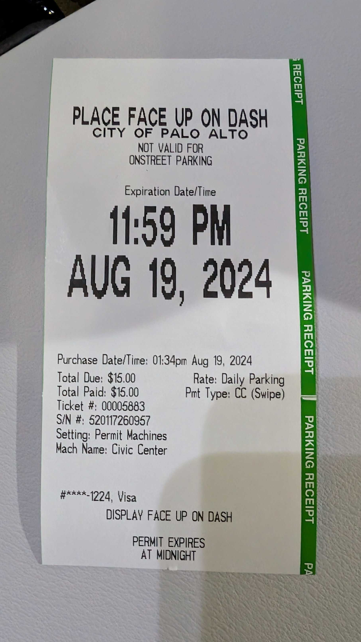

In [ ]:
from PIL import Image

image = Image.open(image_path)
image.resize((image.width // 5, image.height // 5))
